In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import KNN.common_knn as common_knn
import TrainingCurves

import numpy as np
from sklearn import neighbors

In [2]:
PLOT_PREFIX = "Figures/FACES_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_KNN"

In [3]:
# Load Data
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "accuracy")

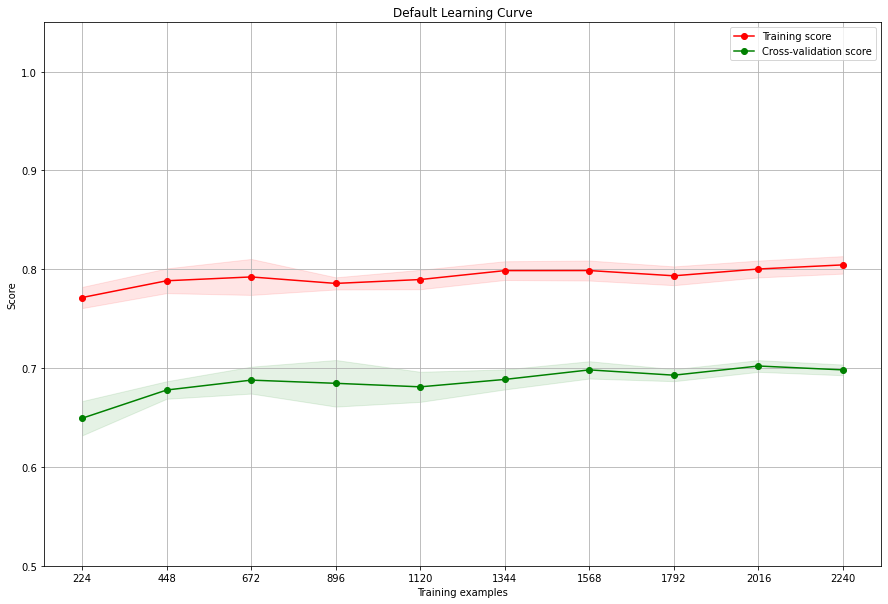

In [5]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [6]:
n_neighbors = [i for i in range(80)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1, 2, 3]

leaf_size = [i for i in range(100)]

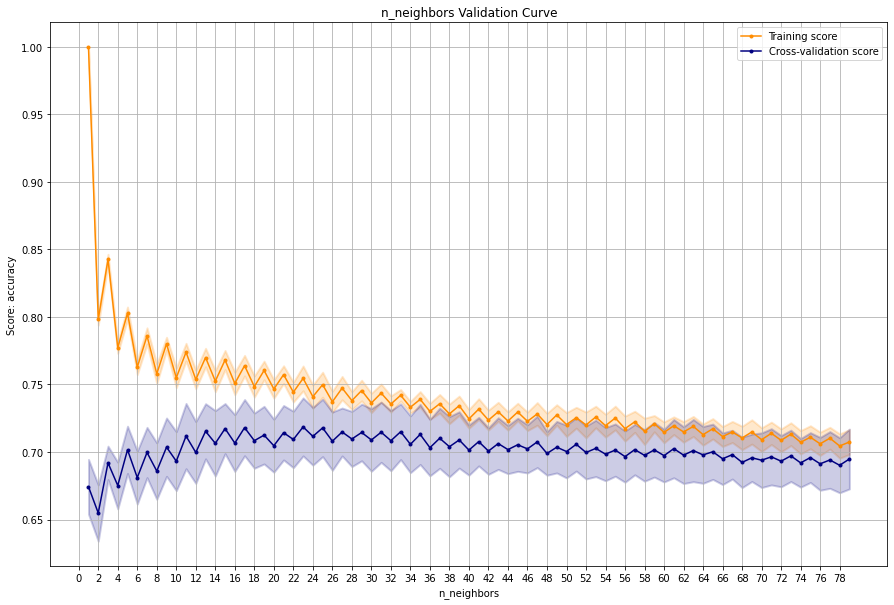

In [7]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "n_neighbors", n_neighbors, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_neighbors", n_neighbors, title="n_neighbors Validation Curve", scoring="accuracy", tick_spacing=2)

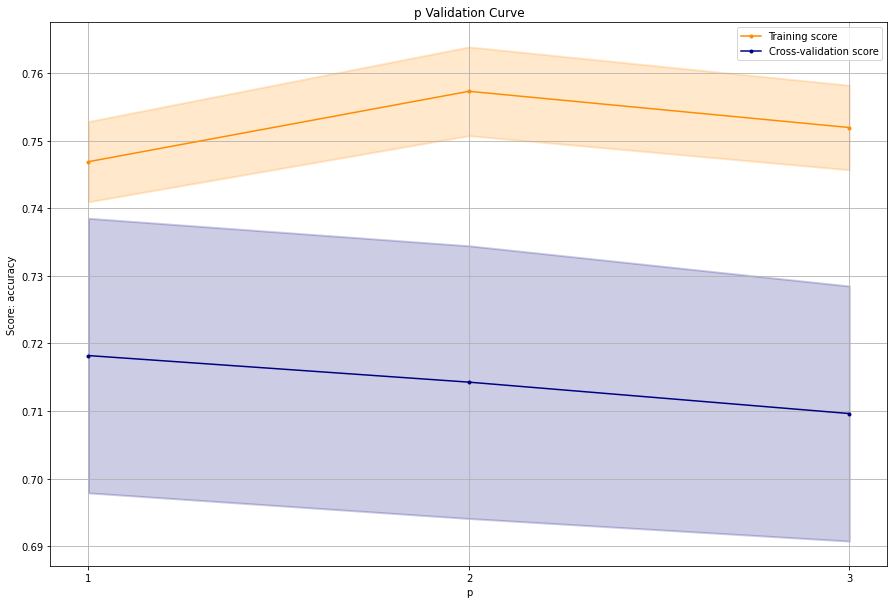

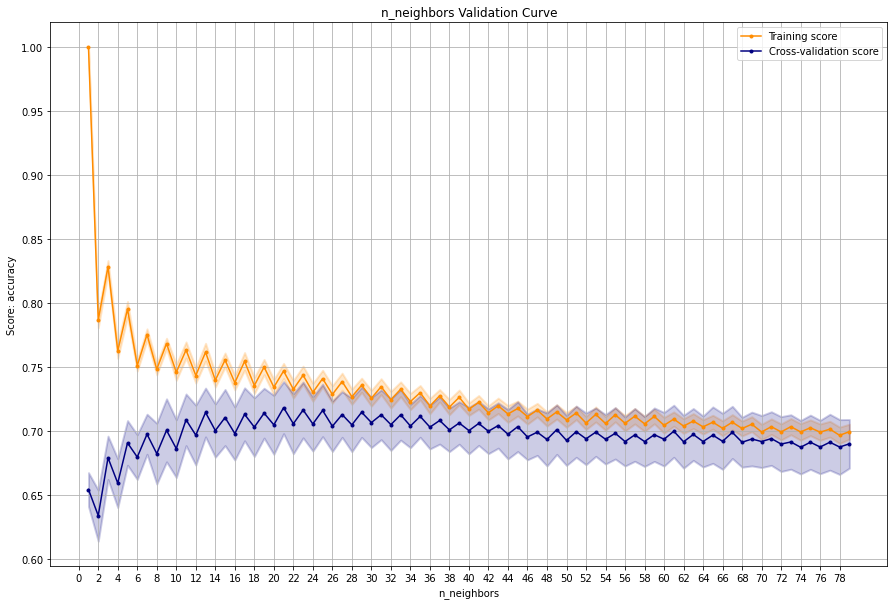

In [12]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(n_neighbors=21), X_train, y_train, "p", p, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "p", p, title="p Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(p=1), X_train, y_train, "n_neighbors", n_neighbors, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_neighbors", n_neighbors, title="n_neighbors Validation Curve", scoring="accuracy", tick_spacing=2)


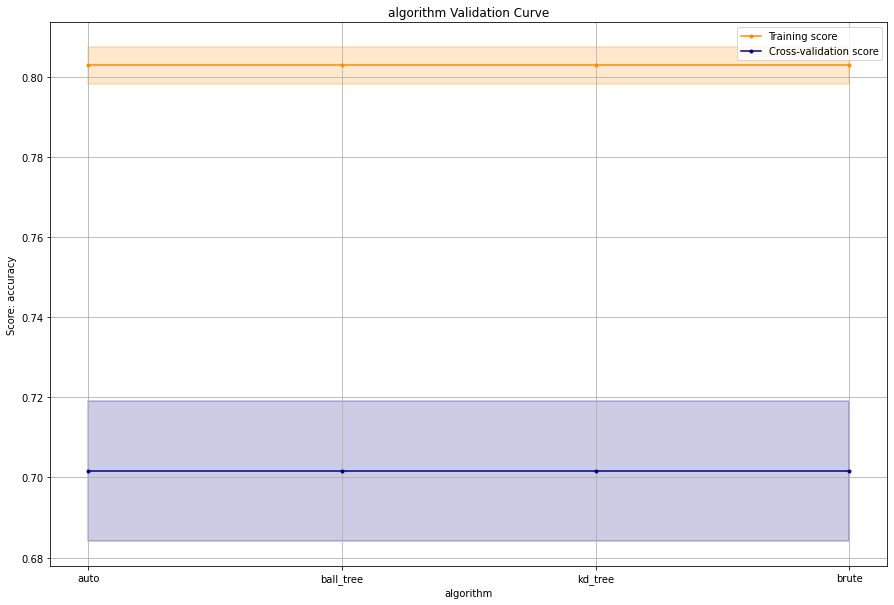

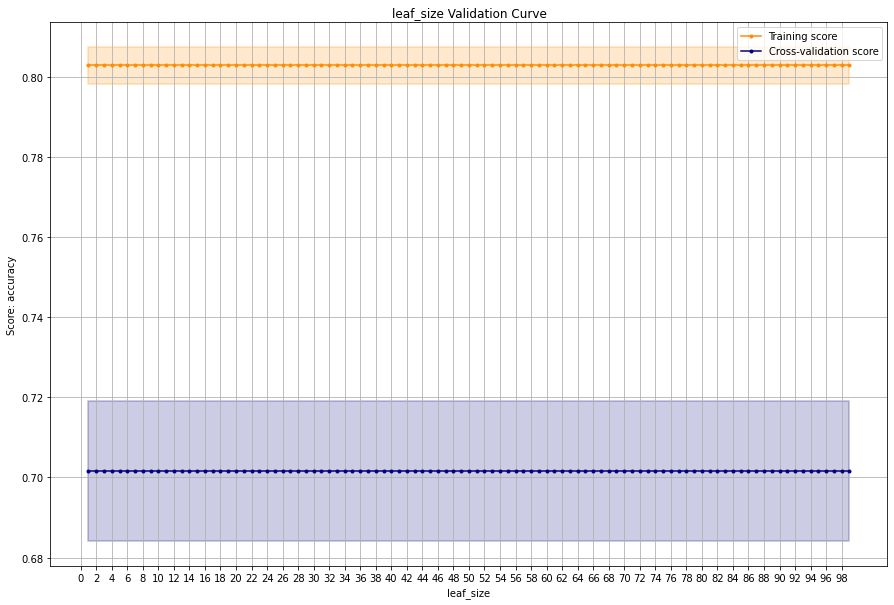

In [9]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "algorithm", algorithm, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "algorithm", algorithm, title="algorithm Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(algorithm='ball_tree'), X_train, y_train, "leaf_size", leaf_size, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "leaf_size", leaf_size, title="leaf_size Validation Curve", scoring="accuracy", tick_spacing=2)

In [10]:
params = {"n_neighbors": 35, "p":1}
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(neighbors.KNeighborsClassifier(**params), X_train, y_train, "accuracy")

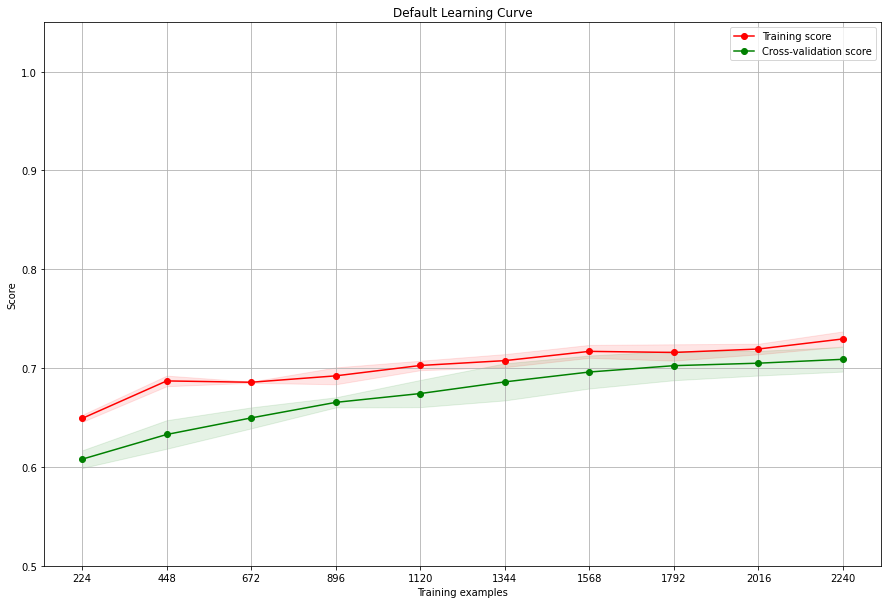

In [11]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)